# Teste de hipótese

#### Neste notebook, realizaremos uma análise para comparar a similaridade entre os chutes do time da casa (home_team_shots), chutes no gol (home_team_shots_on_target_original) e número de escanteios (home_team_corner_count).

Teste de Hipótese sobre a Relação entre Chutes, Chutes no Gol e Escanteios

Hipótese Nula (H0): Não há relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Hipótese Alternativa (H1): Existe uma relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Se o p-valor > 0.05: Aceitamos a hipótese nula (H0), indicando que não há evidência estatística suficiente para afirmar que existe uma relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Se o p-valor < 0.05: Rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1), sugerindo que existe uma relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Para realizar um teste de hipótese sobre a relação linear entre 3 variáveis, como o número de chutes, chutes no gol e escanteios. Nós utilizamos o teste Kruskal-Wallis. Pois ele é adequado para comparar se há diferenças significativas entre as distribuições.

In [9]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,235,145,Andre Marriner,2,0,1,0,11,8,0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,213,98,Martin Atkinson,2,0,2,0,11,12,1
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,191,100,Kevin Friend,1,0,1,0,11,9,0
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,223,101,Mike Dean,1,0,2,0,9,11,0
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,169,77,Chris Kavanagh,2,0,1,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,267,145,Martin Atkinson,0,0,2,0,3,11,0
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,235,145,Jonathan Moss,3,0,3,0,9,6,0
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,207,108,Lee Probert,0,0,1,0,8,6,0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,236,124,Andre Marriner,0,0,2,0,10,13,0


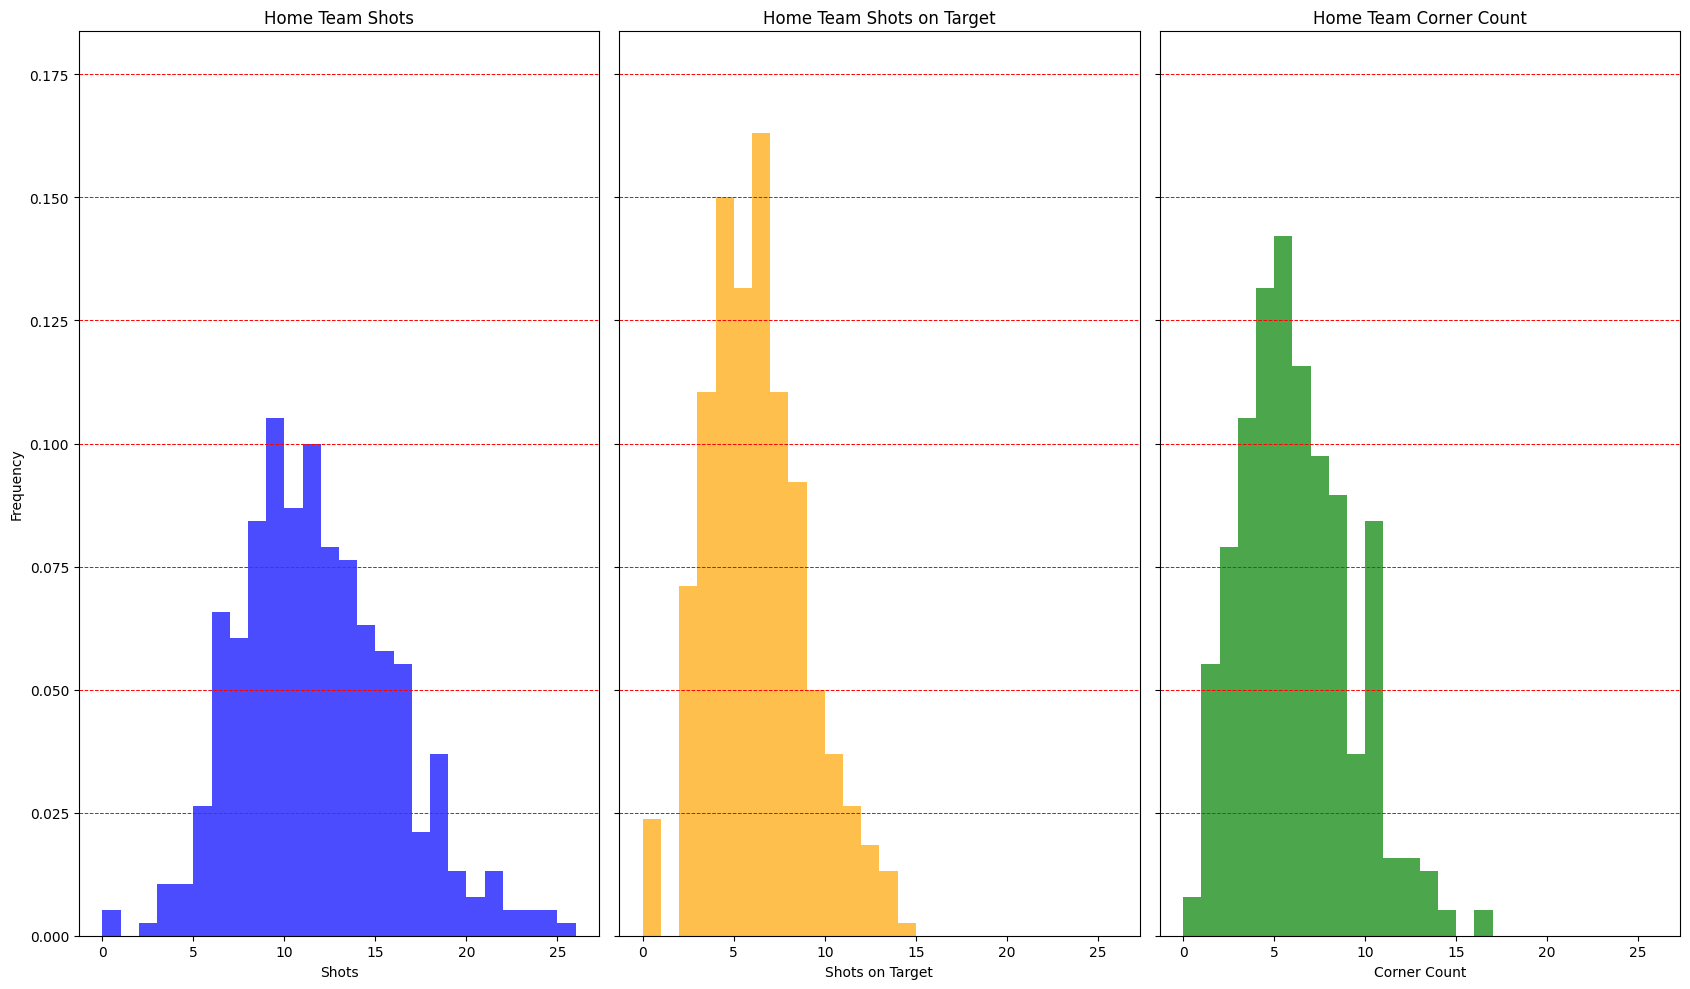

In [21]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_original']
home_team_corner_count = matches_info_df['home_team_corner_count']

# Criação dos plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7, density=True)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Adição das linhas tracejadas verdes
for y in [0.025, 0.050, 0.075, 0.1, 0.125, 0.15, 0.175]:
    ax1.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax3.axhline(y=y, color='red', linestyle='--', linewidth=0.7)

# Plot do histograma de shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7, density=True)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Plot do histograma de home_team_corner_count
ax3.hist(home_team_corner_count, bins=int(home_team_corner_count.max()), color='green', alpha=0.7, density=True)
ax3.set_title('Home Team Corner Count')
ax3.set_xlabel('Corner Count')

# Ajuste do layout
plt.tight_layout()
plt.show()


In [23]:
from scipy.stats import kruskal

# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_original']
home_team_corner_count = matches_info_df['home_team_corner_count']

# Realizar o teste de Kruskal-Wallis
statistic, p_value = kruskal(general_shots, shots_on_target, home_team_corner_count)

# Exibir os resultados
print(f"Kruskal-Wallis H-statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretação dos Resultados
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa entre as distribuições.")
else:
    print("Não rejeitamos a hipótese nula: Não há uma diferença significativa entre as distribuições.")


Kruskal-Wallis H-statistic: 410.4305982436649
P-value: 7.518444345648133e-90
Rejeitamos a hipótese nula: Há uma diferença significativa entre as distribuições.


# Hipotese nula rejeitada, Hipotese alternativa Aceita

O resultado do teste de Kruskal-Wallis mostra que a estatística H é 410.4306 e o p-valor é extremamente pequeno (aproximadamente 
7.52
×
1
0
−
90
7.52×10 
−90
 ). Com um p-valor tão pequeno, rejeitamos a hipótese nula, indicando que há uma diferença significativa entre as distribuições de chutes, chutes no gol e contagem de escanteios do time da casa.